# Reuters Assignment
## Adapted from Deep Learning with Python by Francois Chollet
#### Using the IMDB jupyter notebook as an example follow the prompts below to build a neural network to classify Reuters news wires into 46 different categories.

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

/tmp/ipykernel_13176/1226147920.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [10]:
# Add the necessary libraries and load the data.
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [11]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data(num_words = 10000)

In [12]:
# Print the word index
word_index = tf.keras.datasets.reuters.get_word_index()
sorted(word_index, key = lambda x: word_index[x])[:25]

['the',
 'of',
 'to',
 'in',
 'said',
 'and',
 'a',
 'mln',
 '3',
 'for',
 'vs',
 'dlrs',
 'it',
 'reuter',
 '000',
 '1',
 'pct',
 'on',
 'from',
 'is',
 'that',
 'its',
 'cts',
 'by',
 'at']

In [27]:
# Here is the same function we created for vectorizing the IMDB data.
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

This function is much simpler and easy to read.

In [28]:
# Split the training data into an 80/20 train/validation split, and then vectorize the train/test/validation datasets
x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.2, random_state = 42, stratify=train_labels)

x_train = vectorize_sequences(x_train)
x_val = vectorize_sequences(x_val)
x_test = vectorize_sequences(test_data)

# Print the unique train labels (there should be 46)
# Print the shape of x_train
len(set(y_train)), x_train.shape

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (7185,) + inhomogeneous part.

In [7]:
tf.keras.backend.clear_session()

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(512).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(512).prefetch(tf.data.AUTOTUNE)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, test_labels)).batch(512).prefetch(tf.data.AUTOTUNE)

I0000 00:00:1737609837.048759  598604 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10192 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:10:00.0, compute capability: 8.9
2025-01-23 14:23:57.049936: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 574800000 exceeds 10% of free system memory.
2025-01-23 14:23:57.761213: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 574800000 exceeds 10% of free system memory.


In [8]:
# Build a sequential model network with 1 hidden layer. The input and hidden layer must have more hidden units
# than the number of classification categories. Things to think about: input and hidden layer activation,
# output activation for a multiclass problem, input shape, output units
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(10000,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

In [9]:
# Compile the model. Think about what optimizer, loss function, and metrics will you use.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286,062 (4.91 MB)

 Trainable params: 1,286,062 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train your model on the training data for 20 epochs and 500 batch size and a validation split = 20%.
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20


2025-01-23 14:23:59.076474: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 574800000 exceeds 10% of free system memory.
I0000 00:00:1737609839.812952  598698 service.cc:148] XLA service 0x76fc08006a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737609839.812975  598698 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-01-23 14:23:59.824175: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1737609839.871525  598698 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-23 14:24:00.932216: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_234', 304 bytes spill stores, 304 bytes spill loads

2025-01-23 14:24:01.019580: I external/local_

13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3662 - loss: 3.3936

I0000 00:00:1737609842.520040  598698 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3849 - loss: 3.3310

2025-01-23 14:24:05.245117: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 24 bytes spill stores, 24 bytes spill loads



15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step - accuracy: 0.3925 - loss: 3.3055 - val_accuracy: 0.6333 - val_loss: 1.9994
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6758 - loss: 1.6995 - val_accuracy: 0.7062 - val_loss: 1.4052
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7832 - loss: 1.0926 - val_accuracy: 0.7613 - val_loss: 1.1559
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8476 - loss: 0.7896 - val_accuracy: 0.7941 - val_loss: 1.0274
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8869 - loss: 0.5997 - val_accuracy: 0.8036 - val_loss: 0.9474
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9102 - loss: 0.4671 - val_accuracy: 0.8091 - val_loss: 0.8958
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9268 - loss: 0.3713 - val_accuracy: 0.8108 - val_loss: 0.8668
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9371 - loss: 0.3005 - val_accuracy: 0.8169 - val_loss: 0

In [11]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(history.history)
hist.tail()

,accuracy,loss,val_accuracy,val_loss
15,0.962422,0.102112,0.817474,0.866037
16,0.962143,0.095864,0.813578,0.882508
17,0.963257,0.090505,0.816361,0.881742
18,0.962700,0.086543,0.815804,0.899282
19,0.962839,0.082963,0.817474,0.897212


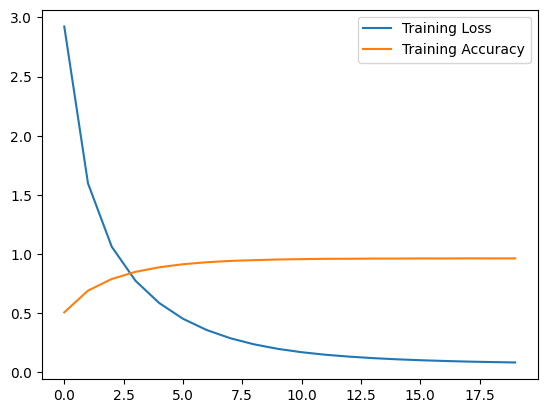

In [12]:
# Let's plot the loss and accuracy vs epochs
plt.plot(hist['loss'], label='Training Loss')
plt.plot(hist['accuracy'], label='Training Accuracy')
plt.legend()
plt.show()

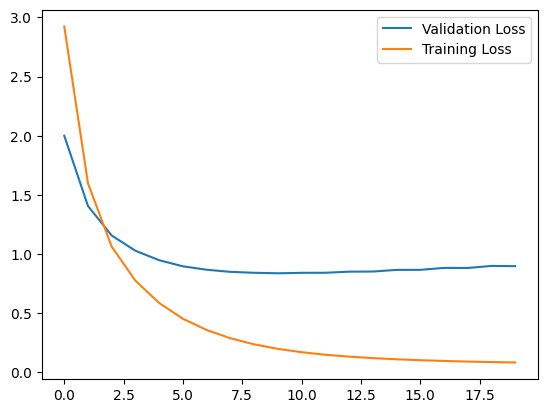

In [13]:
# Use the IMDB example to plot the validataion and training loss vs epochs
plt.plot(hist['val_loss'], label='Validation Loss')
plt.plot(hist['loss'], label='Training Loss')
plt.legend()
plt.show()

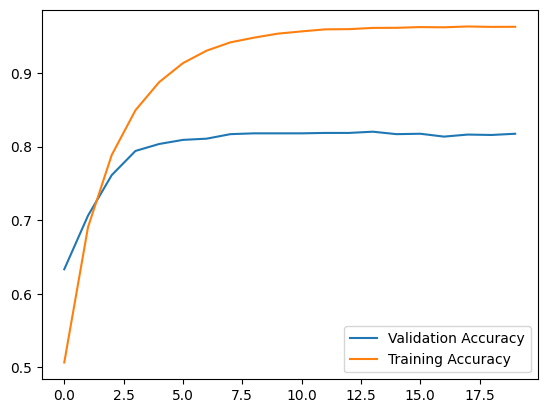

In [14]:
# Use the IMDB example to plot the validation and training accuracy vs epochs
plt.plot(hist['val_accuracy'], label='Validation Accuracy')
plt.plot(hist['accuracy'], label='Training Accuracy')
plt.legend()
plt.show()

In [15]:
# Evaluate the model on the test data and print the results
loss, accuracy = model.evaluate(test_ds)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8047 - loss: 0.8967

2025-01-23 14:24:11.820367: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 24 bytes spill stores, 24 bytes spill loads



5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step - accuracy: 0.8011 - loss: 0.9526
Test Loss: 0.9794
Test Accuracy: 0.7992


Build a new model and try to get the  accuracy as high as you can. Things to try: more hidden layers and hiddent units, activation types, epochs, batch size, and validation_split. Try as many models as you like.  

Be sure to clear the session each time: `backend.clear_session()`. Copy your best model the end of the notebook.


In [16]:
tf.keras.backend.clear_session()

def model_builder(hp):
    n_hidden = hp.Int('n_hidden', min_value=1, max_value=3)
    n_units = hp.Int('n_units', min_value=128, max_value=512, step=2, sampling='log')
    learning_rate = hp.Float('learning_rate', min_value=1e-3, max_value=1e-2, sampling='log')
    dropout = hp.Float('dropout', min_value=0.0, max_value=0.9)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(10000,)))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_units, activation='relu', kernel_initializer='he_normal'))
        model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(46, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [17]:
tuner = kt.BayesianOptimization(model_builder, objective='val_accuracy', max_trials=50, project_name='reuters')
tuner.search(train_ds, validation_data=val_ds, epochs=100, callbacks=[tf.keras.callbacks.EarlyStopping('val_accuracy', patience=3, restore_best_weights=True)])

Trial 50 Complete [00h 00m 08s]
val_accuracy: 0.8252643346786499

Best val_accuracy So Far: 0.8319421410560608
Total elapsed time: 00h 08m 07s


In [18]:
best_trial = tuner.oracle.get_best_trials()[0]
best_trial.summary()

Trial 41 summary
Hyperparameters:
n_hidden: 1
n_units: 512
learning_rate: 0.0033420737434071324
dropout: 0.6272263434574004
Score: 0.8319421410560608


In [19]:
best_trial.best_step

3

In [20]:
best_model = tuner.get_best_models()[0]
loss, accuracy = best_model.evaluate(test_ds)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

/home/chandon/miniconda3/envs/tf-test/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.8203 - loss: 0.8031

2025-01-23 14:32:20.763250: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 24 bytes spill stores, 24 bytes spill loads



5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 346ms/step - accuracy: 0.8124 - loss: 0.8517
Test Loss: 0.8817
Test Accuracy: 0.8072


# Pytorch implementation

I was going to try using pytorch too and I got it running, and recreated the results, but when I tried to run the whole notebook I realized the pytorch package was interfering with the tensorflow package. It was something to do with CuDNN. Oh well. 